<a href="https://colab.research.google.com/github/praveenkr3187/BPPIMTCovidResponse/blob/master/upgrad_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the data

In [ ]:
data = pd.read_csv('loan.csv',index_col=0)
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(39717, 110)

Checking the missing values

In [ ]:
data.isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 110, dtype: int64

Finding columns which contain more than 50% missing data

In [ ]:
check = data.isnull().sum() / len(data) 
check

member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
                                ...   
tax_liens                     0.000982
tot_hi_cred_lim               1.000000
total_bal_ex_mort             1.000000
total_bc_limit                1.000000
total_il_high_credit_limit    1.000000
Length: 110, dtype: float64

Deleting columns with 50% null values

In [ ]:
cols = check[check < 0.5].index
data = data[cols]
data

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [ ]:
data.shape


(39717, 53)

In [ ]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status      

Some columns are of type object which should be of type int or float. Lets check such columns

In [ ]:
#checking for int_rate
data.int_rate.value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64

In [ ]:
#we notice the values end with % so we can trim the extra % sign to change the type to float
data['int_rate'] = data['int_rate'].apply(lambda x: float(x[:-1]))

In [ ]:
#checking for revol_util
data.revol_util.value_counts()

0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

In [ ]:
data.revol_util.isnull().sum()

50

In [ ]:
data['revol_util'].head()

id
1077501    83.70%
1077430     9.40%
1077175    98.50%
1076863       21%
1075358    53.90%
Name: revol_util, dtype: object

In [ ]:
def convertToFloat(x):
  try:
    if(str(x) == "nan" or x == None or str(x)== "NaN"):
      x = 0
    else:
      x = float(x[:-1])
  except:
    print("error converting " + str(x))
  return x

In [ ]:
#we notice the values end with % so we can trim the extra % sign to change the type to float
data['revol_util'] = data['revol_util'].apply(lambda x: convertToFloat(x))

In [ ]:
data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,8.504636e+05,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.656783e+05,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,6.667800e+05,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,8.508120e+05,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,1.047339e+06,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [ ]:
data.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
member_id,1.000000,0.140710,0.150322,0.257887,0.074725,0.081025,0.009380,0.096963,-0.008119,-0.047086,...,0.031565,-0.015155,0.123627,NaN,NaN,NaN,NaN,NaN,-0.008769,NaN
loan_amnt,0.140710,1.000000,0.981578,0.940034,0.309415,0.930288,0.271149,0.066439,-0.031864,0.009229,...,0.135446,0.072853,0.448742,NaN,NaN,NaN,NaN,NaN,-0.037180,NaN
funded_amnt,0.150322,0.981578,1.000000,0.958422,0.312619,0.956159,0.266965,0.066283,-0.032355,0.009259,...,0.136284,0.074676,0.453133,NaN,NaN,NaN,NaN,NaN,-0.038502,NaN
funded_amnt_inv,0.257887,0.940034,0.958422,1.000000,0.306657,0.905039,0.254375,0.074689,-0.038501,-0.005712,...,0.123759,0.060358,0.442604,NaN,NaN,NaN,NaN,NaN,-0.042746,NaN
int_rate,0.074725,0.309415,0.312619,0.306657,1.000000,0.282703,0.053185,0.111162,0.157916,0.133013,...,0.122259,0.066380,0.157775,NaN,NaN,NaN,NaN,NaN,0.082550,NaN
installment,0.081025,0.930288,0.956159,0.905039,0.282703,1.000000,0.270874,0.054186,-0.019657,0.009722,...,0.118152,0.075467,0.401688,NaN,NaN,NaN,NaN,NaN,-0.034103,NaN
annual_inc,0.009380,0.271149,0.266965,0.254375,0.053185,0.270874,1.000000,-0.122732,0.023083,0.033908,...,0.021589,0.015604,0.140401,NaN,NaN,NaN,NaN,NaN,-0.016801,NaN
dti,0.096963,0.066439,0.066283,0.074689,0.111162,0.054186,-0.122732,1.000000,-0.034452,0.001405,...,0.024878,0.011033,0.005212,NaN,NaN,NaN,NaN,NaN,0.005691,NaN
delinq_2yrs,-0.008119,-0.031864,-0.032355,-0.038501,0.157916,-0.019657,0.023083,-0.034452,1.000000,0.008091,...,0.012315,0.013912,-0.012149,NaN,NaN,NaN,NaN,NaN,0.003375,NaN
inq_last_6mths,-0.047086,0.009229,0.009259,-0.005712,0.133013,0.009722,0.033908,0.001405,0.008091,1.000000,...,0.018972,0.012420,0.028514,NaN,NaN,NaN,NaN,NaN,0.016346,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  float64
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status      

In [ ]:
numeric_var = [key for key in dict(data.dtypes)
                   if dict(data.dtypes)[key]
                       in ['float64','float32','int32','int64']] # Numeric Variable

cat_var = [key for key in dict(data.dtypes)
             if dict(data.dtypes)[key] in ['object'] ]

In [ ]:
for x in cat_var:
  print('=======')
  print(x)
  print(data[x].describe())

term
count          39717
unique             2
top        36 months
freq           29096
Name: term, dtype: object
grade
count     39717
unique        7
top           B
freq      12020
Name: grade, dtype: object
sub_grade
count     39717
unique       35
top          B3
freq       2917
Name: sub_grade, dtype: object
emp_title
count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object
emp_length
count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object
home_ownership
count     39717
unique        5
top        RENT
freq      18899
Name: home_ownership, dtype: object
verification_status
count            39717
unique               3
top       Not Verified
freq             16921
Name: verification_status, dtype: object
issue_d
count      39717
unique        55
top       Dec-11
freq        2260
Name: issue_d, dtype: object
loan_status
count          39717
unique             3
top       Fully Paid

In [ ]:
#from the description we see that emp_title, last_credit_pull_d, last_pymnt_d, earliest_cr_line, 

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [ ]:
['emp_title', 'emp_length', 'issue_d', '']

In [ ]:
len(numeric_var) + len(cat_var) == data.shape[1]

False

term


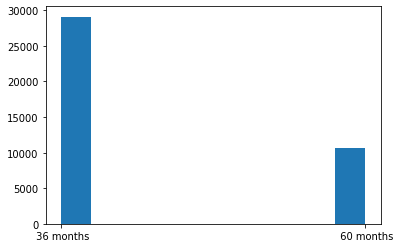

grade


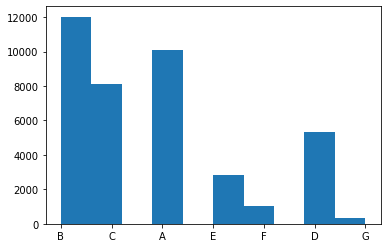

sub_grade


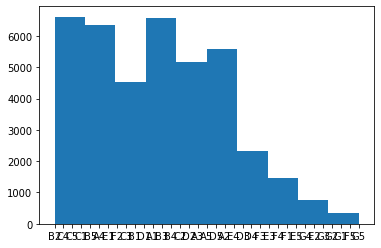

home_ownership


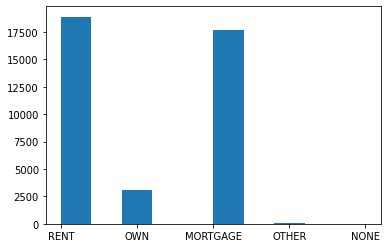

verification_status


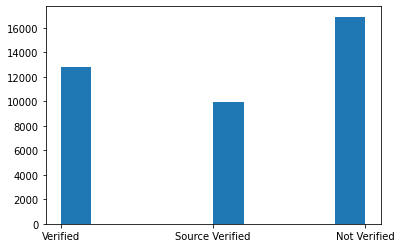

issue_d


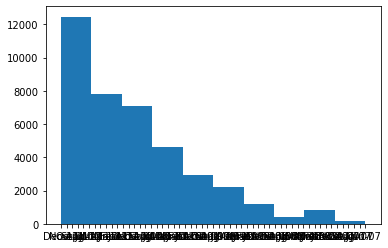

loan_status


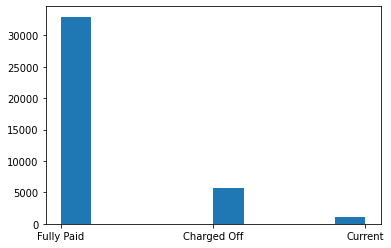

pymnt_plan


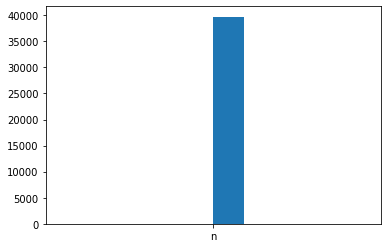

url


KeyboardInterrupt: ignored

In [ ]:
for var in cat_var:
  print(var)
  plt.hist(data[var])
  plt.show()